# VAE Unsupervised exploration of the CaT stellar library

Data download: http://svocats.cab.inta-csic.es/catlib

#### ACKNOWLEDGMENT
This work is based on data from the CaT service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries.

In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np

from pythonosc import udp_client
import time

import os
from fnmatch import fnmatch

from pathlib import Path

In [2]:
root = '## YOUR FOLDER PATH TO THE DOWNLOADED SPECTRA ##'
target = "scan001.fits"

In [3]:
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, target):
            print([os.path.join(path, name)])

['/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan001.fits']


In [4]:
file = [os.path.join(path, name)]
str = " " 
Ffile = (str.join(file))  

route = Path(Ffile)

Fname = route.with_suffix('')

In [5]:
type (Ffile)
print (Ffile)
print (Fname)

/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347.fits
/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347


In [6]:
file[0]

'/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347.fits'

In [7]:
files

['scan446.fits',
 'scan016.fits',
 'scan503.fits',
 'scan153.fits',
 'scan295.fits',
 'scan041.fits',
 'scan411.fits',
 'scan104.fits',
 'scan554.fits',
 'scan387.fits',
 'scan692.fits',
 'scan368.fits',
 'scan407.fits',
 'scan057.fits',
 'scan542.fits',
 'scan112.fits',
 'scan391.fits',
 'scan684.fits',
 'scan450.fits',
 'scan145.fits',
 'scan515.fits',
 'scan283.fits',
 'scan329.fits',
 'scan094.fits',
 'scan581.fits',
 'scan702.fits',
 'scan352.fits',
 'scan647.fits',
 'scan217.fits',
 'scan539.fits',
 'scan493.fits',
 'scan169.fits',
 'scan186.fits',
 'scan305.fits',
 'scan240.fits',
 'scan610.fits',
 'scan485.fits',
 'scan190.fits',
 'scan313.fits',
 'scan606.fits',
 'scan256.fits',
 'scan082.fits',
 'scan578.fits',
 'scan128.fits',
 'scan597.fits',
 'scan344.fits',
 'scan201.fits',
 'scan651.fits',
 'scan626.fits',
 'scan276.fits',
 'scan299.fits',
 'scan333.fits',
 'scan221.fits',
 'scan671.fits',
 'scan364.fits',
 'scan558.fits',
 'scan108.fits',
 'scan667.fits',
 'scan237.fits

In [8]:
file

['/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan347.fits']

In [9]:
from astropy.io import fits

file = "/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan145.fits"#input('Path and name of the fits-file: ')

sp = fits.open(file)
print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')

flux2 = np.zeros(sp[0].header['NAXIS1'], dtype=float)

flux2 = np.array(sp[0].data)
flux_norm = flux2/(np.nanmax(flux2))

wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  790 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy andCOMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.COMMENT   Contact the NASA Science Office of Standards and Technology for the   COMMENT   FITS Definition document #100 and other FITS information.             COMMENT   ----------------------------------------------------------------------COMMENT   ************************** REDUCEME HEADER ***************************COMMENT   ----------------------------------------------------------------------HISTORY   D

In [10]:
flux_ok = np.reshape(flux_norm, (sp[0].header['NAXIS1']))

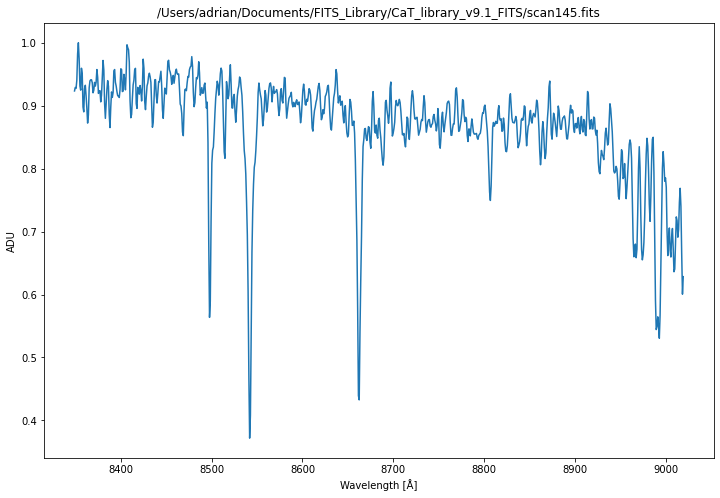

In [11]:
# Plot the spectrum
fig = plt.figure(1, figsize=(12, 8))
plt.plot(wave2, flux_ok)
plt.xlabel('Wavelength [Å]')
plt.ylabel('ADU')
plt.title(file)
plt.show()

Number of files in the folder

In [12]:
num = 1
dim1 = sp[0].header['NAXIS1']
for path, subdirs, files in os.walk(root):
    for nanme in files:
        num += 1
print(num)
print(dim1)

707
790


In [13]:
curves = 0
custom_set = np.zeros((num, dim1))
label_set = np.zeros((num, ), dtype=int)
spectra_set = [''] * num

for path, subdirs, files in os.walk(root):
    for name in files:
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        data, header = fits.getdata(Ffile, header=True)
        hdu_number = 0
        fits.getheader(Ffile, hdu_number)
        fits_file = Ffile
        
        with fits.open(fits_file, mode='readonly') as hdulist:
            hdulist.info()
            data = np.array(hdulist[0].data)
             
            data_norm = np.reshape(data/(np.nanmax(data)), (sp[0].header['NAXIS1']))

            
            label_set[curves] = curves
            spectra_set[curves] = name
            for i in range (dim1):
                custom_set[curves,i] = (data_norm[i])
        hdulist.close   
        curves += 1
   
            
#--------------------------------------------------------------------
        print ("Spectra loaded:",curves+1, "spectra");

Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan446.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 2 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 3 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan503.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 4 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan153.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 5 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_

Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan610.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 37 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan485.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 38 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan190.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 39 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan313.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 40 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v

Spectra loaded: 71 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan077.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 72 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan309.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 73 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan165.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 74 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan535.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 75 spectra
Filename: /Users/adrian/Documents

Spectra loaded: 106 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan076.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 107 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan518.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 108 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan148.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 109 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan261.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 110 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 141 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan492.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 142 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan168.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 143 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan187.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 144 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan703.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 145 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 176 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan335.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 177 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan159.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 178 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan509.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 179 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan227.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 180 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 211 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan437.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 212 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan440.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 213 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 214 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan505.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 215 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 246 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan303.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 247 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan246.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 248 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan616.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 249 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan483.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 250 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 281 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan210.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 282 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan139.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 283 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan093.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 284 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan569.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 285 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 316 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan174.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 317 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan461.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 318 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 319 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan318.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 320 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 351 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan570.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 352 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan659.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 353 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan209.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 354 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan198.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 355 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 386 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan272.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 387 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan205.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 388 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan655.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 389 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan340.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 390 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 421 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan546.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 422 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan116.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 423 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan403.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 424 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan053.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 425 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 456 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan394.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 457 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan140.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 458 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan510.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 459 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 460 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 491 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan361.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 492 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan224.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 493 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan674.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 494 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan418.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 495 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 526 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan571.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 527 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan203.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 528 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan653.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 529 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan346.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 530 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 561 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan540.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 562 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan110.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 563 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan405.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 564 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan055.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 565 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 596 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan560.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 597 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan130.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 598 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan219.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 599 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan649.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 600 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 631 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan326.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 632 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan263.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 633 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan633.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 634 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan218.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 635 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 666 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan412.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 667 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan691.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 668 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan384.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 669 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan541.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 670 spectra
Filename: /Users/adrian/Docu

Spectra loaded: 701 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan310.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 702 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan594.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 703 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan081.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 704 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan202.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectra loaded: 705 spectra
Filename: /Users/adrian/Docu

Creating the Dataset

In [14]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [15]:
label_set = np.asarray(label_set)

In [16]:
custom_set.shape

(707, 790)

In [17]:
label_set.shape

(707,)

In [18]:
augmentation = 50
custom_set = np.repeat(custom_set, augmentation, axis=0)
label_set = np.repeat(label_set, augmentation, axis=0)

In [19]:
custom_set.shape

(35350, 790)

In [20]:
label_set.shape

(35350,)

In [21]:
dataset = tf.data.Dataset.from_tensor_slices((custom_set, label_set))
dataset.element_spec

2024-01-29 22:15:22.132384: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(TensorSpec(shape=(790,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Splitting OK

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(custom_set,label_set,test_size=0.2,random_state=123)

## VAE

In [26]:
import tensorflow as tf
from tensorflow.keras import layers

In [27]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim), mean=0., stddev=0.00000001)#0.001_e-3
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [29]:
original_dim = dim1
latent_dim = 6
intermediate_dim = dim1/3
intermediate_dim2 = intermediate_dim/2
intermediate_dim3 = intermediate_dim2/2
intermediate_dim4 = intermediate_dim3/latent_dim

In [30]:
original_inputs = tf.keras.Input(shape=(original_dim,), name="encoder_input")
x1 = layers.Dense(intermediate_dim, activation="relu")(original_inputs)
x2 = layers.Dense(intermediate_dim2, activation="relu")(x1)
x3 = layers.Dense(intermediate_dim3, activation="relu")(x2)
x4 = layers.Dense(intermediate_dim4, activation="relu")(x3)

z_mean = layers.Dense(latent_dim, name="z_mean")(x4)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x4)
z = Sampling()((z_mean, z_log_var))
encoder = tf.keras.Model(inputs=original_inputs, outputs=z, name="encoder")

In [31]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 790)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 263)          208033      ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 131)          34584       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 65)           8580        ['dense_1[0][0]']                
                                                                                            

In [32]:
latent_inputs = tf.keras.Input(shape=(latent_dim,), name="z_sampling")
x5 = layers.Dense(intermediate_dim4, activation="relu")(latent_inputs)
x6 = layers.Dense(intermediate_dim3, activation="relu")(x5)
x7 = layers.Dense(intermediate_dim2, activation="relu")(x6)
x8 = layers.Dense(intermediate_dim, activation="relu")(x7)

outputs = layers.Dense(original_dim, activation="sigmoid")(x8)
decoder = tf.keras.Model(inputs=latent_inputs, outputs=outputs, name="decoder")

In [33]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 6)]               0         
                                                                 
 dense_4 (Dense)             (None, 10)                70        
                                                                 
 dense_5 (Dense)             (None, 65)                715       
                                                                 
 dense_6 (Dense)             (None, 131)               8646      
                                                                 
 dense_7 (Dense)             (None, 263)               34716     
                                                                 
 dense_8 (Dense)             (None, 790)               208560    
                                                                 
Total params: 252,707
Trainable params: 252,707
Non-trainab

In [34]:
outputs = decoder(z)
vae6D = tf.keras.Model(inputs=original_inputs, outputs=outputs, name="VAE6D")

In [35]:
vae6D.summary()

Model: "VAE6D"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 790)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 263)          208033      ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 131)          34584       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 65)           8580        ['dense_1[0][0]']                
                                                                                              

In [36]:
kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae6D.add_loss(kl_loss)

In [37]:
vae6D.summary()

Model: "VAE6D"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 790)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 263)          208033      ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 131)          34584       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 65)           8580        ['dense_1[0][0]']                
                                                                                              

In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
vae6D.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
vae6D.fit(x_train, x_train, epochs=100, batch_size=2)

Epoch 1/100
14140/14140 [==============================] - 30s 2ms/step - loss: 0.0189
Epoch 2/100
14140/14140 [==============================] - 30s 2ms/step - loss: 0.0051
Epoch 3/100
14140/14140 [==============================] - 29s 2ms/step - loss: 0.0039
Epoch 4/100
14140/14140 [==============================] - 29s 2ms/step - loss: 0.0033
Epoch 5/100
14140/14140 [==============================] - 29s 2ms/step - loss: 0.0031
Epoch 6/100
14140/14140 [==============================] - 30s 2ms/step - loss: 0.0029
Epoch 7/100
14140/14140 [==============================] - 29s 2ms/step - loss: 0.0028
Epoch 8/100
14140/14140 [==============================] - 29s 2ms/step - loss: 0.0027
Epoch 9/100
14140/14140 [==============================] - 29s 2ms/step - loss: 0.0026
Epoch 10/100
14140/14140 [==============================] - 29s 2ms/step - loss: 0.0026
Epoch 11/100
14140/14140 [==============================] - 29s 2ms/step - loss: 0.0025
Epoch 12/100
14140/14140 [===============

In [39]:
encoded_test = encoder(x_test)

In [40]:
decoded_test = vae6D(x_test)

In [41]:
decoded_imgs_test=decoded_test.numpy()
decoded_imgs_test

array([[0.914708  , 0.930482  , 0.9604375 , ..., 0.70542514, 0.7572737 ,
        0.8132859 ],
       [0.8703564 , 0.89870477, 0.9438792 , ..., 0.7326505 , 0.7955545 ,
        0.8487602 ],
       [0.9486031 , 0.95250785, 0.9635079 , ..., 0.692715  , 0.7362429 ,
        0.77563894],
       ...,
       [0.9675333 , 0.96452653, 0.97091436, ..., 0.5475411 , 0.6065179 ,
        0.6512663 ],
       [0.9019647 , 0.92944276, 0.96554244, ..., 0.80773926, 0.8679106 ,
        0.9036795 ],
       [0.92029667, 0.93216425, 0.9570337 , ..., 0.693153  , 0.7423162 ,
        0.79556537]], dtype=float32)

Text(0.5, 0, 'Decoded Spectra')

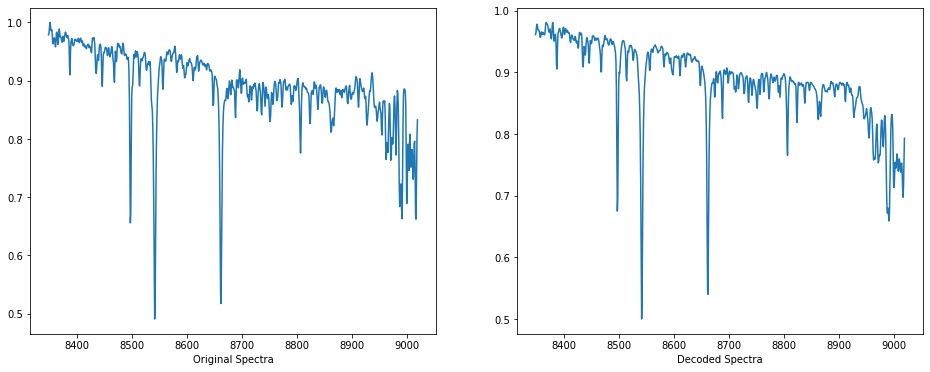

In [42]:
figure = 43
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(wave2, x_test[figure])
ax[0].set_xlabel('Original Spectra')   
ax[1].plot(wave2, decoded_imgs_test[figure])
ax[1].set_xlabel('Decoded Spectra')

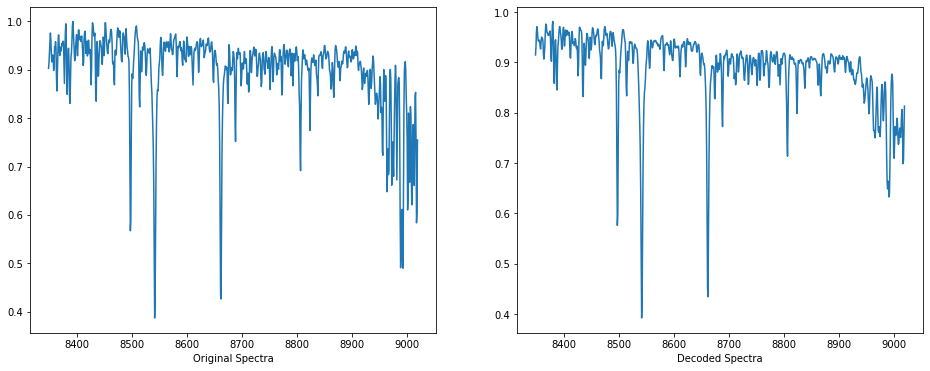

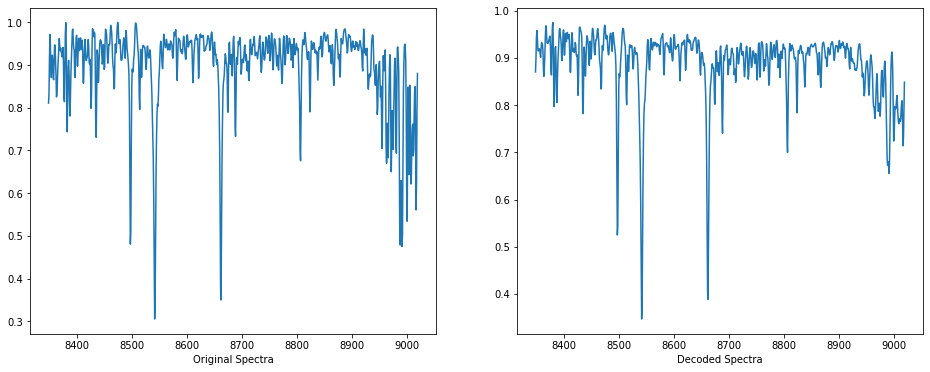

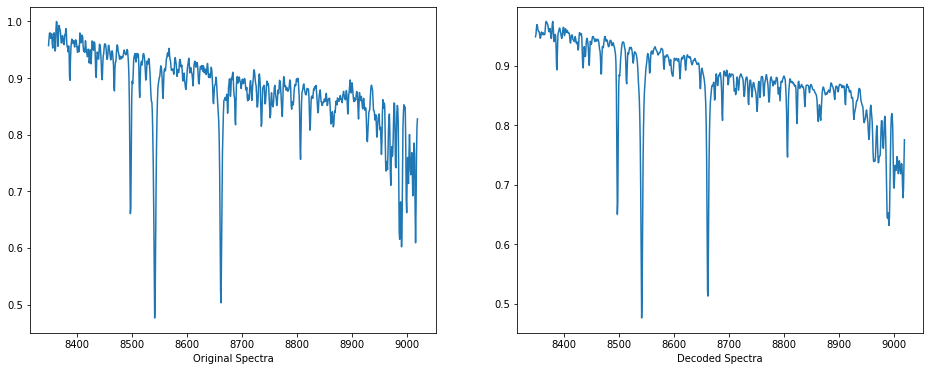

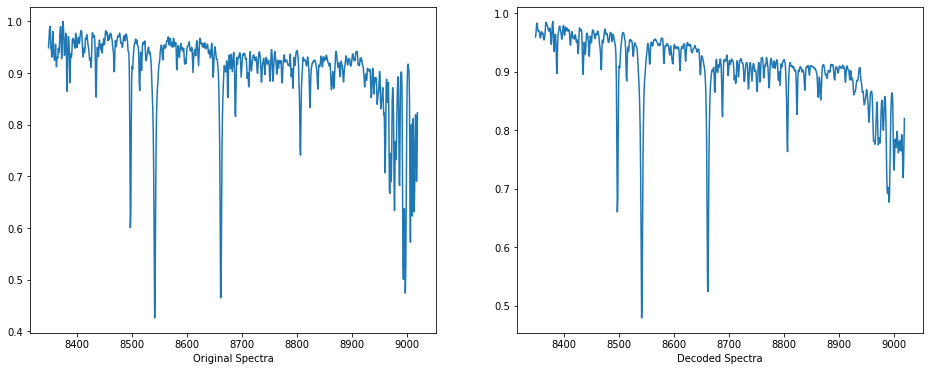

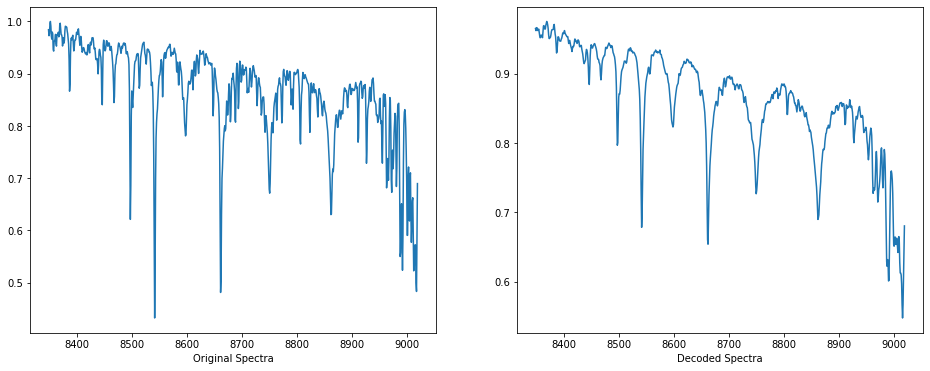

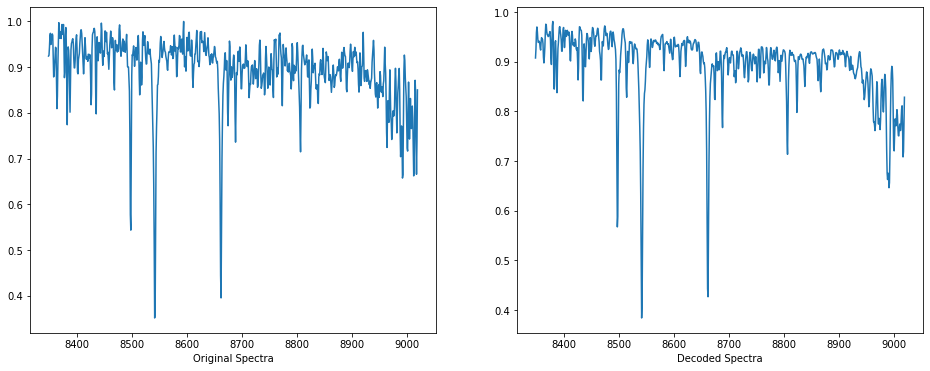

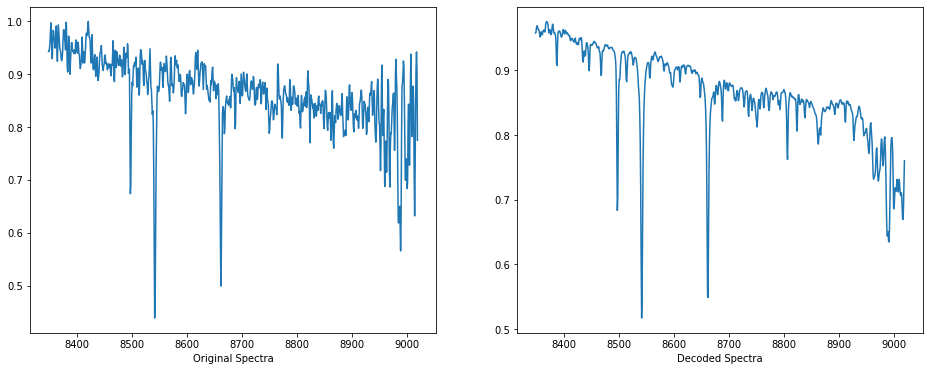

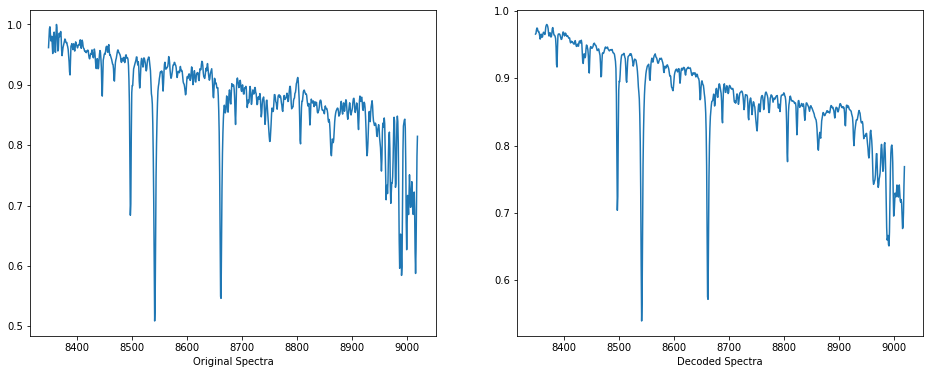

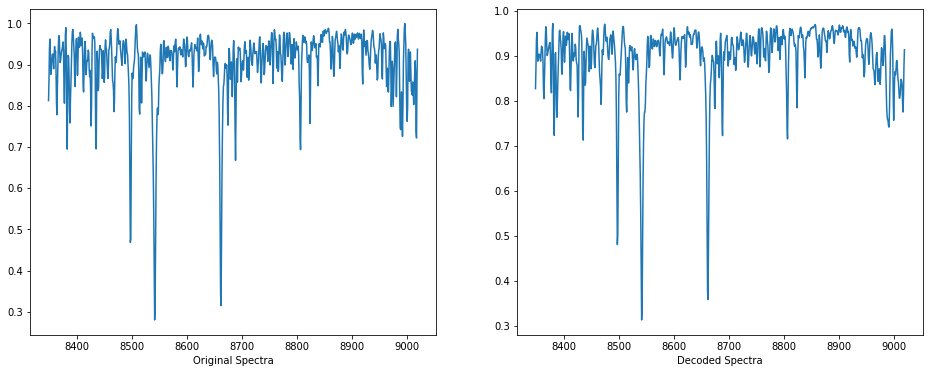

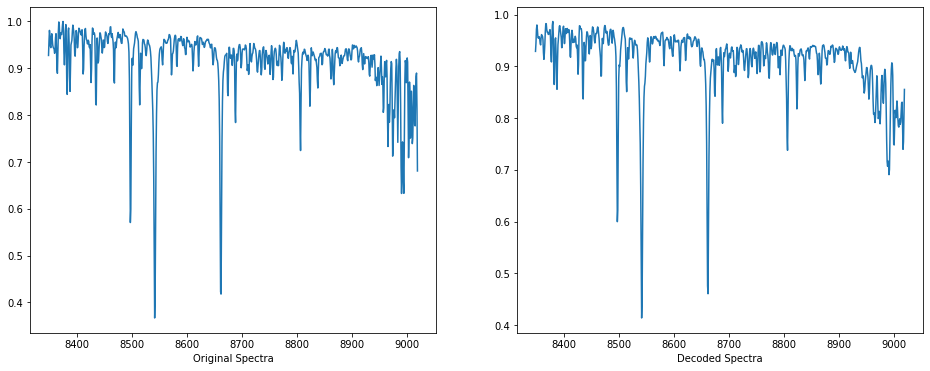

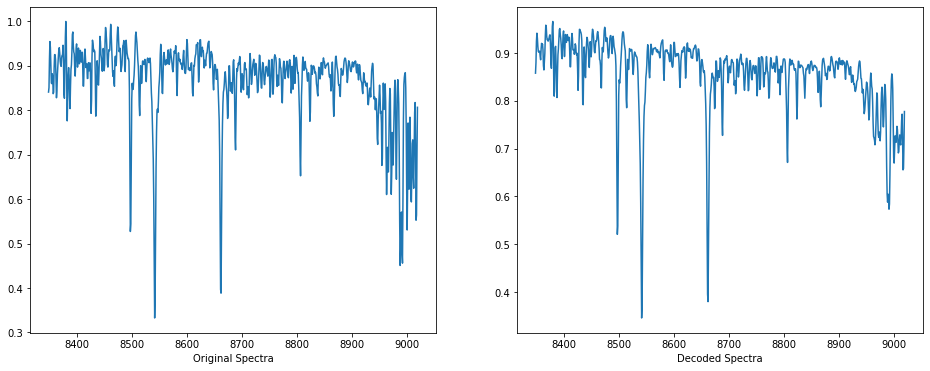

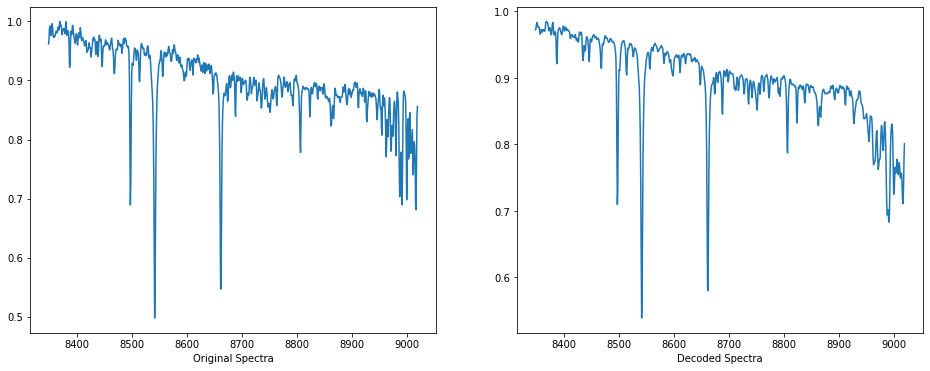

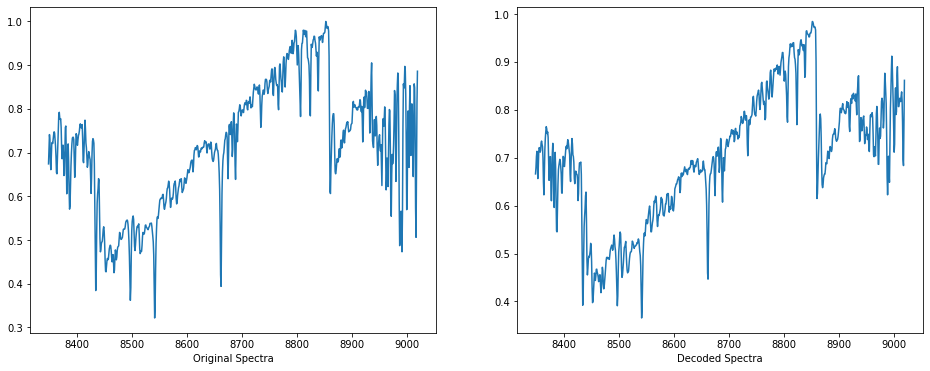

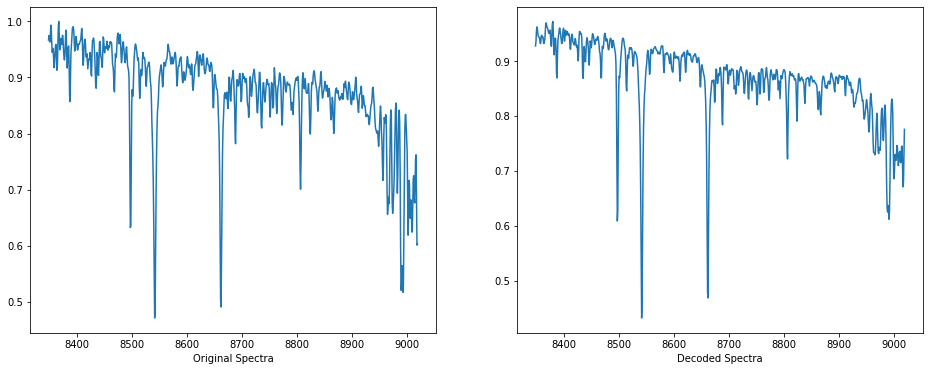

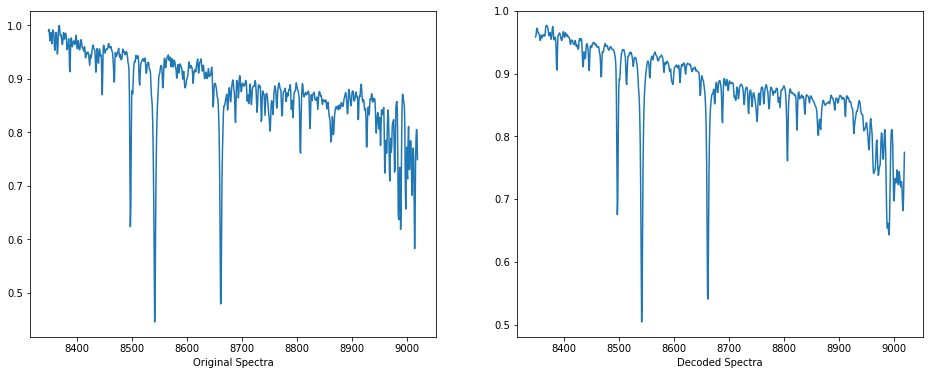

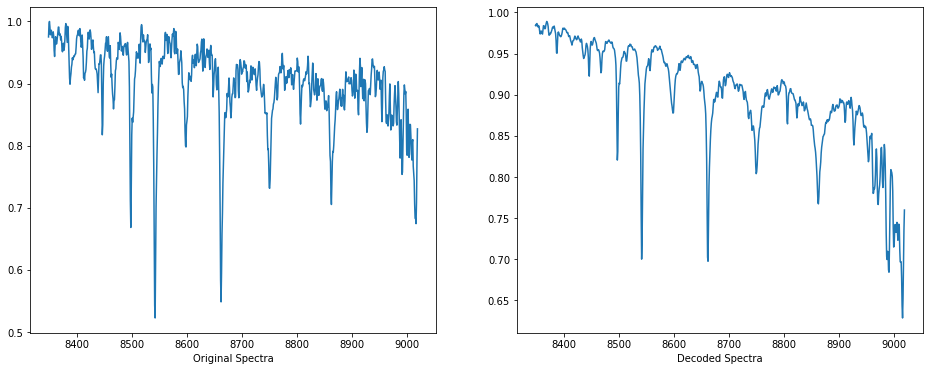

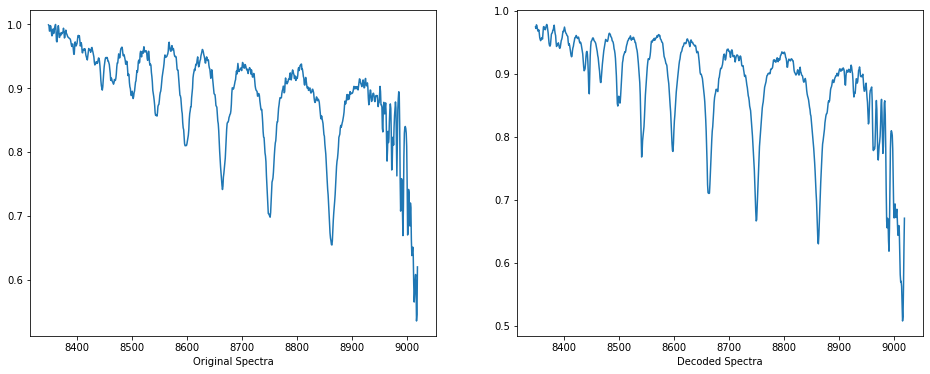

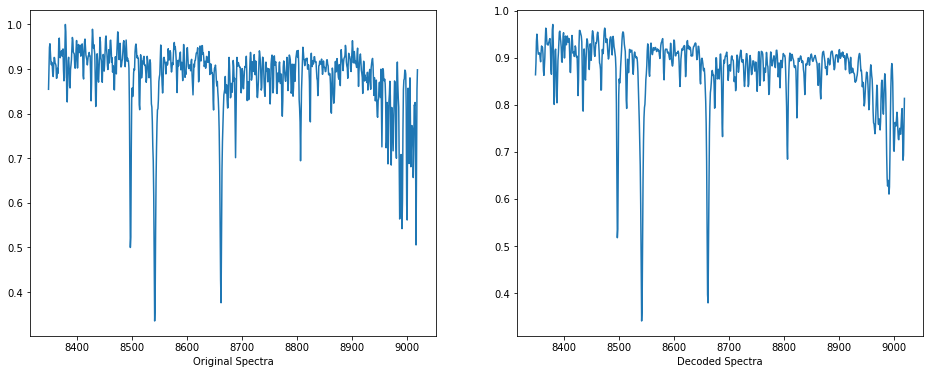

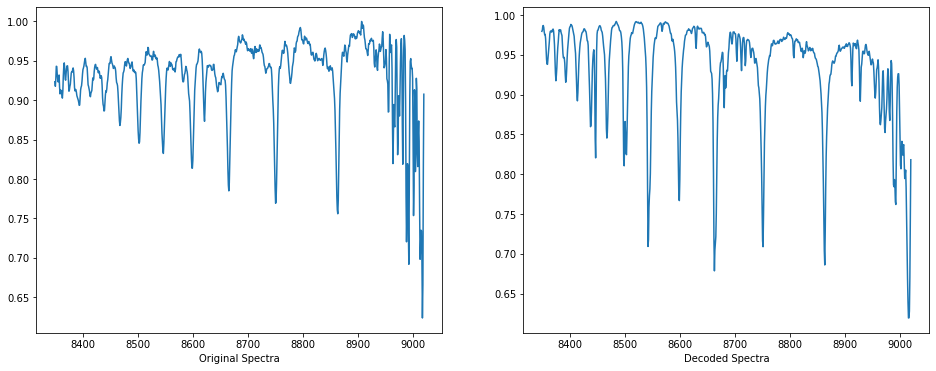

In [43]:
for m in range(20):
    figure = m
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(wave2, x_test[figure])
    ax[0].set_xlabel('Original Spectra')   
    ax[1].plot(wave2, decoded_imgs_test[figure])
    ax[1].set_xlabel('Decoded Spectra')

plt.close(fig)

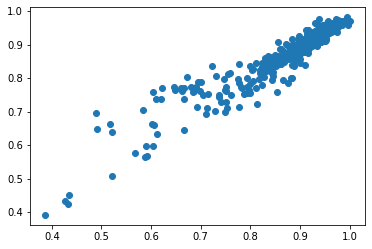

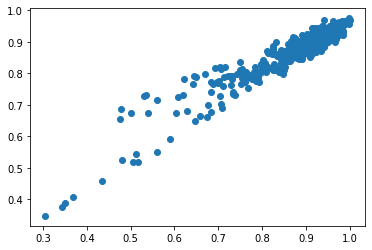

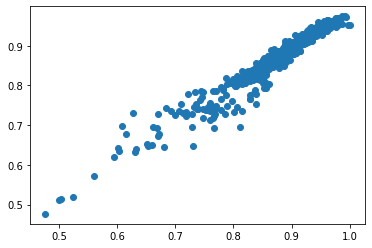

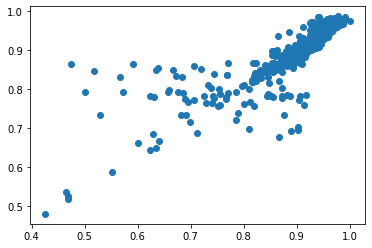

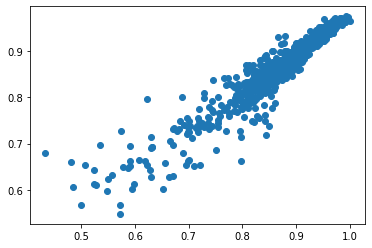

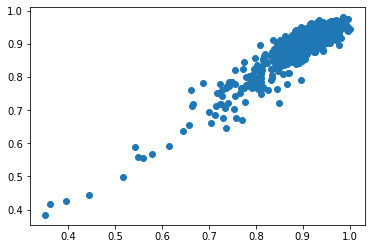

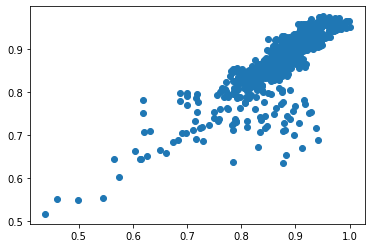

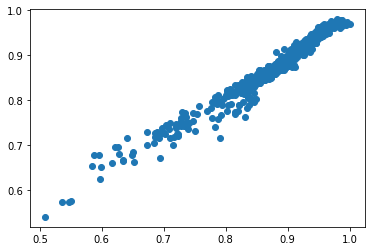

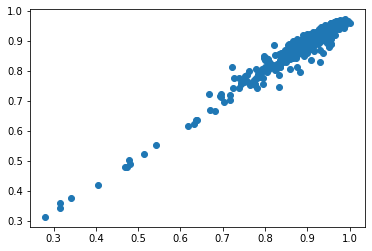

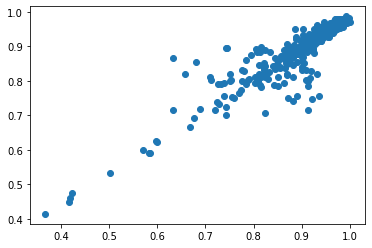

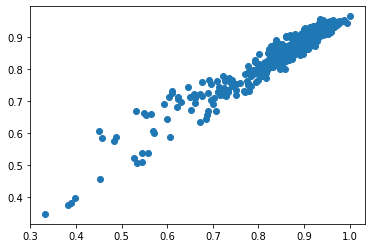

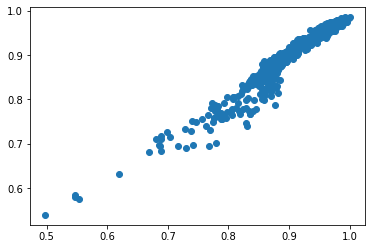

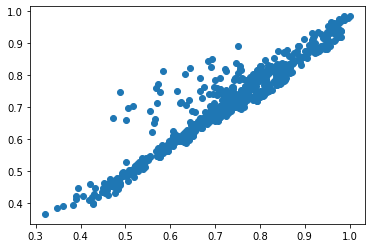

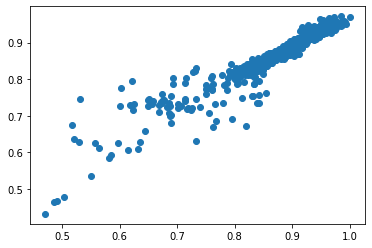

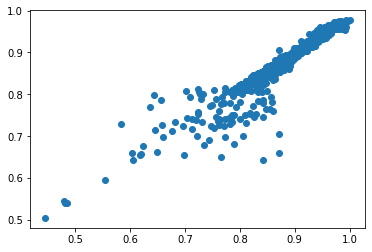

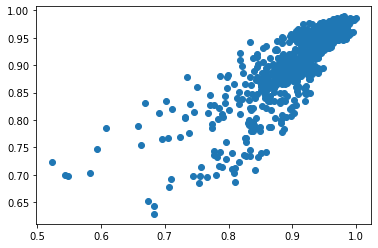

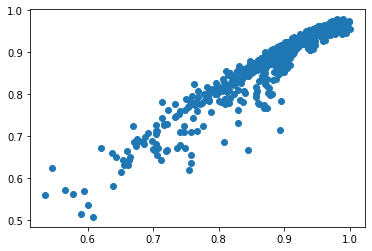

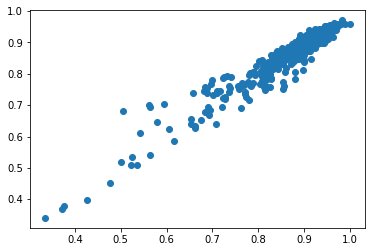

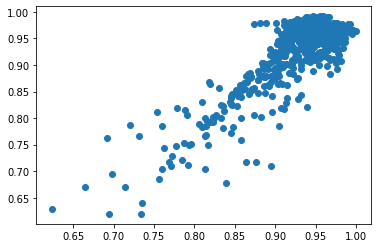

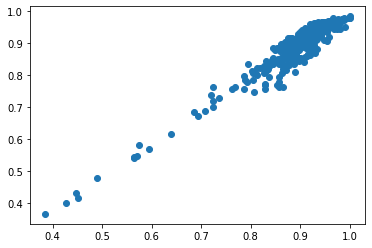

In [45]:
for sample in range(20):
    _ = plt.plot(x_test[sample], decoded_imgs_test[sample], 'o')
    plt.show()

In [47]:
encoded_test[figure]

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([-0.00657997, -0.00019038, -0.00428673,  0.00570046, -0.00190118,
        0.00284353], dtype=float32)>

In [48]:
np.shape(encoded_test)

TensorShape([7070, 6])

In [49]:
decoded_imgs_test[figure]

array([0.8906384 , 0.921376  , 0.96131825, 0.9728344 , 0.95388937,
       0.9329537 , 0.9328964 , 0.93975157, 0.9401615 , 0.9359095 ,
       0.9285537 , 0.9243259 , 0.94022447, 0.94895226, 0.94468963,
       0.94297475, 0.92773354, 0.88656497, 0.8661514 , 0.89048153,
       0.92162365, 0.95720136, 0.978013  , 0.9763236 , 0.9562787 ,
       0.9425612 , 0.94458926, 0.94405806, 0.9460553 , 0.9499674 ,
       0.9548831 , 0.9579371 , 0.9367777 , 0.88957065, 0.86829877,
       0.91853774, 0.9717422 , 0.9831588 , 0.9433767 , 0.8352965 ,
       0.79844826, 0.87290674, 0.93502575, 0.93846416, 0.8972814 ,
       0.8299306 , 0.81485516, 0.86745656, 0.90605056, 0.92819476,
       0.9525247 , 0.9713374 , 0.9729002 , 0.9614716 , 0.9538426 ,
       0.94152445, 0.9073982 , 0.90661633, 0.94181365, 0.9662187 ,
       0.9712739 , 0.9481867 , 0.9233229 , 0.93770826, 0.96427184,
       0.9641117 , 0.95072967, 0.95624274, 0.9685201 , 0.9629046 ,
       0.9574448 , 0.9661943 , 0.9651035 , 0.9320331 , 0.88211

In [50]:
np.shape(decoded_imgs_test)

(7070, 790)

In [51]:
from sklearn.metrics import r2_score
r2_score(x_test, decoded_imgs_test, multioutput='variance_weighted')

0.8681515646248039

In [55]:
decoded_imgs2 = vae6D(x_train).numpy()

In [56]:
r2_score(x_train, decoded_imgs2, multioutput='variance_weighted')

0.8622799798743985

In [57]:
r2_score(x_train[43], decoded_imgs2[43], multioutput='variance_weighted')

0.8833153158665871

In [59]:
vae6D.save('CaT_VAE.tf',save_format='tf')

INFO:tensorflow:Assets written to: CaT_VAE.tf/assets


In [61]:
from numpy import save
weights = vae6D.get_weights()
vae6D.save_weights('CaT_VAE_Weights', weights)

In [62]:
encoder.save('CaT_6DVAE_Encoder-augmented.tf', save_format='tf')

INFO:tensorflow:Assets written to: CaT_6DVAE_Encoder-augmented.tf/assets


In [63]:
decoder.save('CaT_6DVAE_Decoder-augmented.tf', save_format='tf')

INFO:tensorflow:Assets written to: CaT_6DVAE_Decoder-augmented.tf/assets
